In [48]:
import math
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
print('done')

done


In [49]:
#load in the data
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
df["species"] = df["species"].str.replace("Iris-", "")

In [51]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Exploratory data analysis

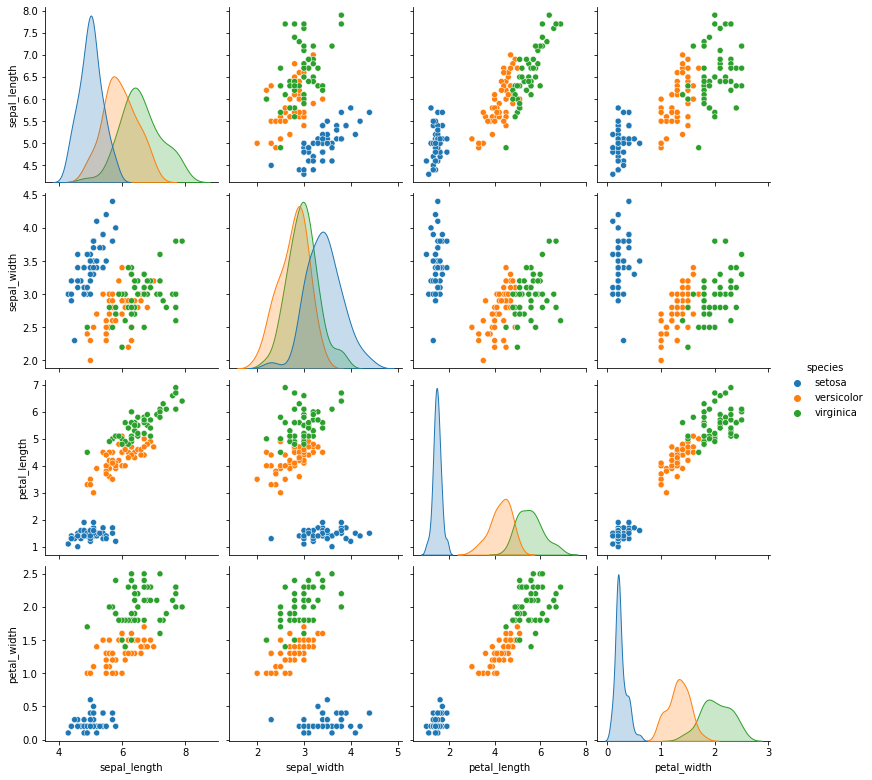

In [52]:
sns.pairplot(df, hue="species", height=2.75)

In [53]:
df["species_num"] = df["species"]

In [54]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [55]:
df["species_num"] = df["species_num"].str.replace("setosa", "1")
df["species_num"] = df["species_num"].str.replace("versicolor", "2")
df["species_num"] = df["species_num"].str.replace("virginica", "3")

In [56]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [57]:
df["species_num"] = pd.to_numeric(df["species_num"], downcast = "integer")

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_num   150 non-null    int8   
dtypes: float64(4), int8(1), object(1)
memory usage: 6.1+ KB


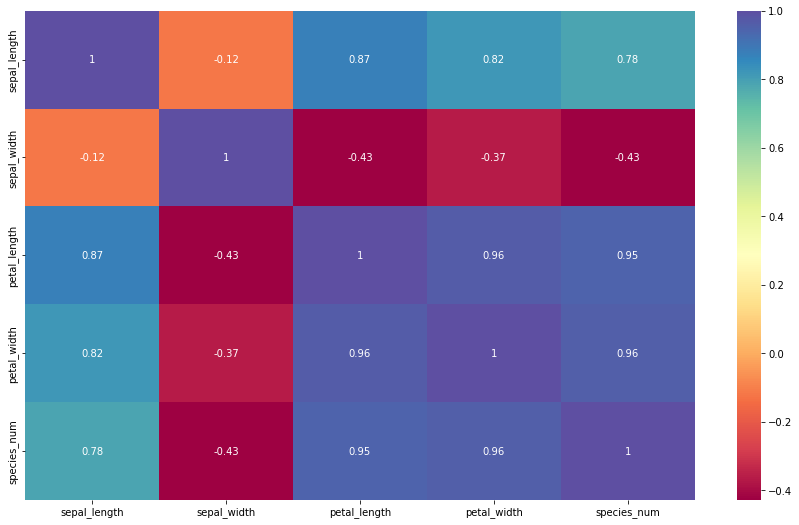

In [59]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), cmap='Spectral', annot = True);

In [60]:
df.drop(["petal_length", "species_num"], axis = 1, inplace = True)

In [61]:
df.head()

,sepal_length,sepal_width,petal_width,species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


Decision tree modeling

In [62]:
X = df.drop(["species"], axis = 1)
y = df.species

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt_model = DecisionTreeClassifier()

In [67]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
y_pred = dt_model.predict(X_test)

In [69]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [70]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9736842105263158


In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
#data in different splits can establish accuracy 
cv_scores = cross_val_score(estimator=dt_model, X = X_train, y = y_train, cv=10)
cv_scores.mean()

0.9210606060606061

In [73]:
#all of the accuracy values , 1= 100% accuracy 
cv_scores

array([0.91666667, 1.        , 1.        , 0.91666667, 0.75      ,
       0.81818182, 1.        , 0.90909091, 0.9       , 1.        ])

In [74]:
#rows represent actual labels, columns represent predictive labels
#correctly guessed 15 first values for first class
#only one incorrect prediction in the other class
#all guessed correctly in last class 
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


Text(0.5, 15.0, 'Predicted Label')

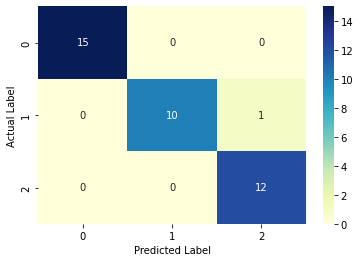

In [75]:
#view confusion matrix 
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [77]:
from sklearn import tree

In [78]:
list(df.columns[:-1])

['sepal_length', 'sepal_width', 'petal_width']

In [79]:
#add features to a variable, and the target variable 
features = list(df.columns[:-1])
targets = ["setosa", "versicolor", "virginica"]

In [80]:
print(features)

['sepal_length', 'sepal_width', 'petal_width']


In [81]:
print(targets)

['setosa', 'versicolor', 'virginica']


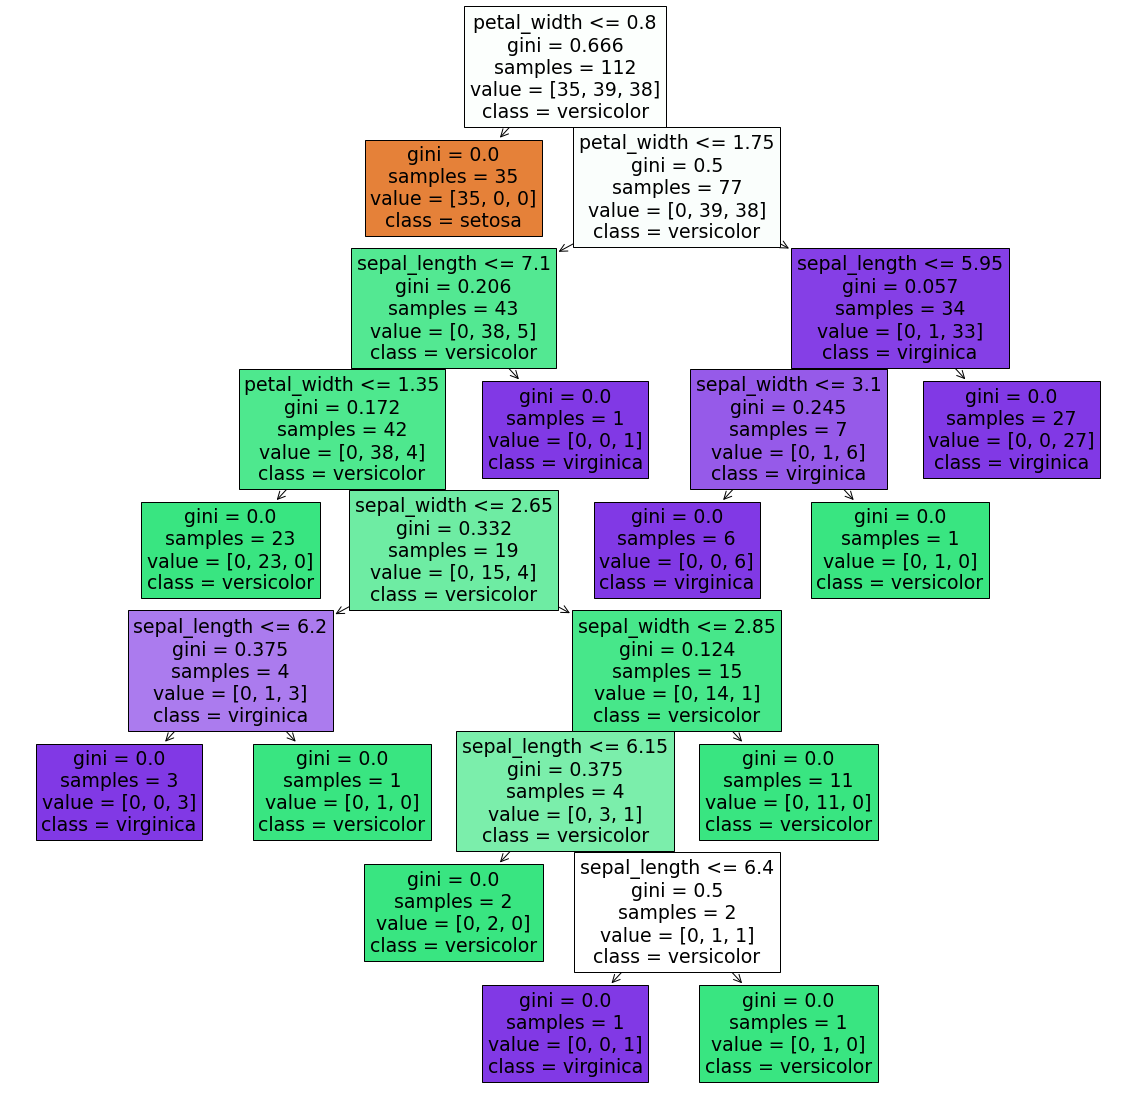

In [82]:
#draw our graph
#tree2 
plt.figure(figsize=(20,20))
tree2 = tree.plot_tree(dt_model, filled=True, feature_names = features, class_names = targets)

Hyperparameter optimization

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
dt_model2 = DecisionTreeClassifier()

In [85]:
#create dictionary of the parameters we will try 
dt_params = {"criterion": ["gini", "entropy"],
             "max_depth": np.arange(2,14,2),
             "max_features": ["auto", "sqrt", "log2"]}

In [86]:
dt_cv_model = GridSearchCV(estimator = dt_model2, param_grid=dt_params, cv=10)

In [87]:
dt_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12]),
     

In [88]:
dt_cv_model.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt'}

In [89]:
#write in parameters determined by grid search cv 
dt_tuned = DecisionTreeClassifier(criterion="gini", max_depth=6, max_features="sqrt")

In [90]:
#fit model object 
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [91]:
#test model on our x test data 
y_pred = dt_tuned.predict(X_test)

In [92]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 1.0


In [93]:
cv_scores = cross_val_score(estimator=dt_tuned, X=X_train, y=y_train, cv=10)
cv_scores.mean()

0.8595959595959597

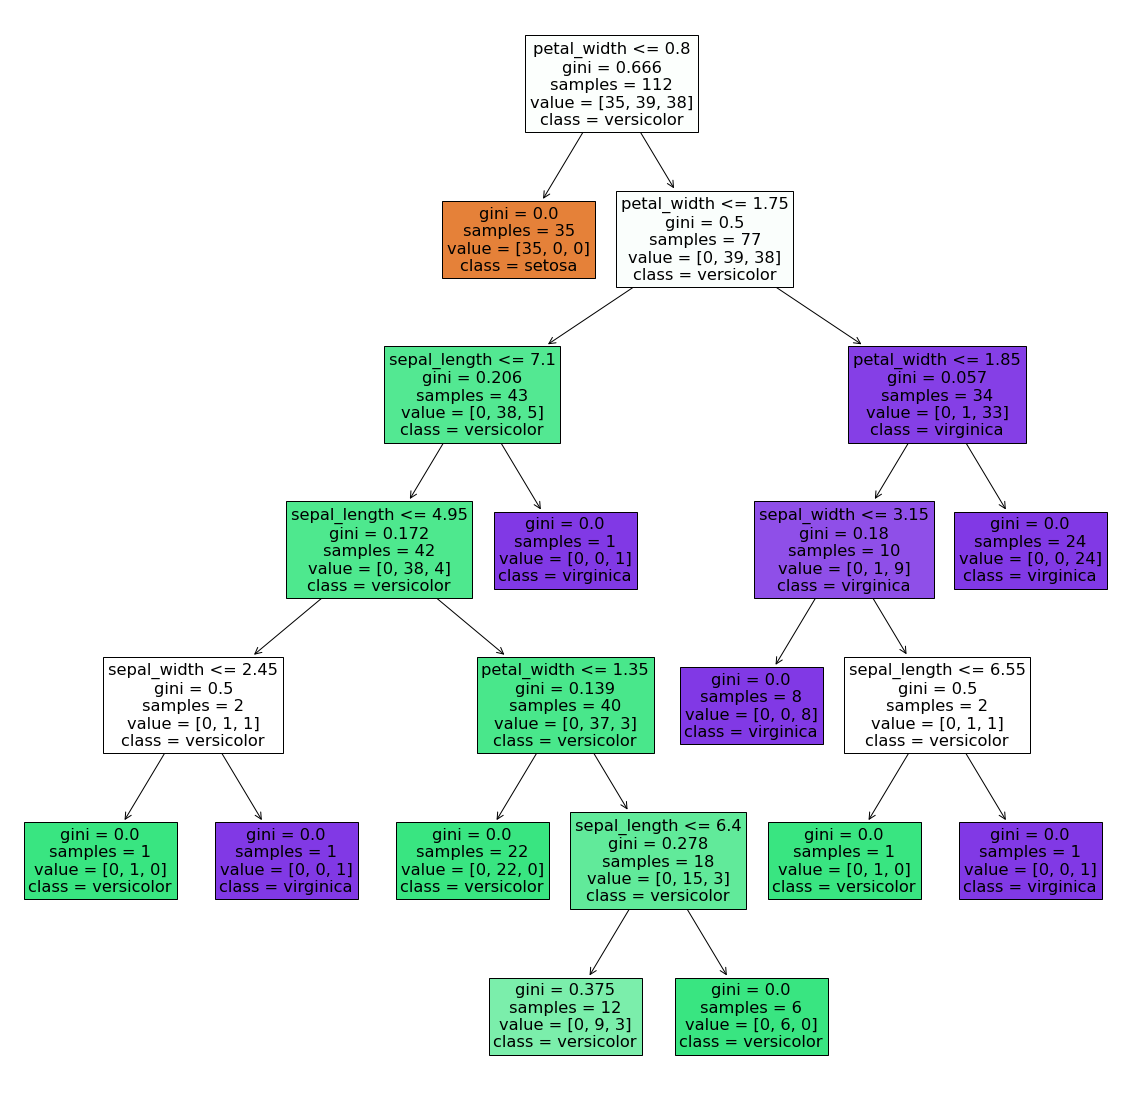

In [94]:
plt.figure(figsize=(20,20))
tree2=tree.plot_tree(dt_tuned, filled=True, feature_names=features, class_names=targets)